# XG Boost #

<b> Table of Contents: </b>
<br> [Pipeline 1](#101)
<br> [Pipeline 2](#202)
<br> [Pipeline 3](#303)

Loading Modules

In [2]:
# import modules
import pandas as pd
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import graphviz
from sklearn.metrics import confusion_matrix, classification_report

<a id = "101"> <h2> Pipeline 1 </h2> </a>
___

Loading the Dataset

In [3]:
# load the dataset
# read csv file to a pandas dataframe
df_pipeline1 = pd.read_csv("pipeline_1.csv")

In [4]:
# check for the dataset's keys
df_pipeline1.keys()

Index(['Q4', 'VisitorType_New_Visitor', 'Q3', 'TrafficType_2', 'TrafficType_8',
       'TrafficType_3', 'PageValues_iqr_yj_zscore', 'Q1', 'TrafficType_13',
       'ExitRates_iqr_yj_zscore', 'OperatingSystems_3',
       'Administrative_Duration_iqr_yj_zscore', 'TrafficType_1',
       'SpecialDay_0.8', 'Month_Feb', 'Browser_6', 'SpecialDay_0.4',
       'TrafficType_20', 'Informational_Duration_pp_iqr_yj_zscore',
       'Browser_12', 'OperatingSystems_7', 'TrafficType_16', 'Revenue'],
      dtype='object')

In [5]:
# check for the size of the dataset
df_pipeline1.shape

(12330, 23)

In [6]:
# ---------------------------------------------------------------------------------------------------
# Extract needed features as a list of columns 
# excluding target variable 'Revenue' and original object features (that were labelencoded), namely 'Month' and VisitorType'
# ---------------------------------------------------------------------------------------------------
## create a list of all the columns
list_all_columns = df_pipeline1.columns.tolist()

## remove features in list, which are not needed for testing for feature selection, namely:
list_remove_features = ['Month', 'VisitorType', 'Revenue'] 

# Create sets of a,b
setA = set(list_all_columns)
setB = set(list_remove_features)

# Get new set with elements that are only in a but not in b
setlist_X_columns = setA.difference(list_remove_features)

# convert set object to a list
list_X_columns = list(setlist_X_columns)

# Define dependent variables
X = df_pipeline1[list_X_columns].to_numpy()

#show the columns that need to be included as features
## sort alphabetically
list_X_columns.sort()
## show list 
list_X_columns

['Administrative_Duration_iqr_yj_zscore',
 'Browser_12',
 'Browser_6',
 'ExitRates_iqr_yj_zscore',
 'Informational_Duration_pp_iqr_yj_zscore',
 'Month_Feb',
 'OperatingSystems_3',
 'OperatingSystems_7',
 'PageValues_iqr_yj_zscore',
 'Q1',
 'Q3',
 'Q4',
 'SpecialDay_0.4',
 'SpecialDay_0.8',
 'TrafficType_1',
 'TrafficType_13',
 'TrafficType_16',
 'TrafficType_2',
 'TrafficType_20',
 'TrafficType_3',
 'TrafficType_8',
 'VisitorType_New_Visitor']

In [7]:
# separate the target variable and rest of variables using iloc
X = df_pipeline1[list_X_columns]
Y = df_pipeline1['Revenue']

In [8]:
#convert the dataset into an optimized data structure called DMatrix
data_dmatrix = xgb.DMatrix(data=X,label=Y)

/opt/tljh/user/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/tljh/user/lib/python3.6/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


In [9]:
# create the train and test set for cross validation
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2019)

In [10]:
# instantiate an XG Boost regressor object 
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 100)

In [11]:
# fit the regressor to the training set and make predictions on the test set
xg_reg.fit(X_train,Y_train)

preds = xg_reg.predict(X_test)

In [12]:
# compute the rmse
rmse = np.sqrt(mean_squared_error(Y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 0.279213


In [13]:
# create a hyperparameter dictionary 
params = {"objective":"reg:squarederror",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=5,
                    num_boost_round=100,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=2019)

In [14]:
cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,0.466052,0.000138,0.466195,0.000361
1,0.443322,0.003439,0.443472,0.003513
2,0.423813,0.004227,0.423975,0.003800
3,0.407213,0.006612,0.407416,0.006079
4,0.390641,0.004908,0.391278,0.005655


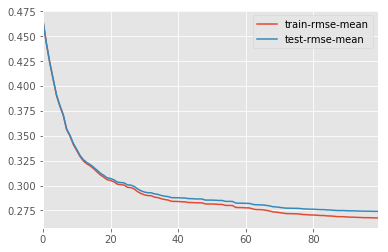

In [15]:
# visualize how rmse changed over training
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

cv_results[['train-rmse-mean','test-rmse-mean']].plot()

In [16]:
# print the final boosting round metric
print((cv_results["test-rmse-mean"]).tail(1))

99    0.274078
Name: test-rmse-mean, dtype: float64


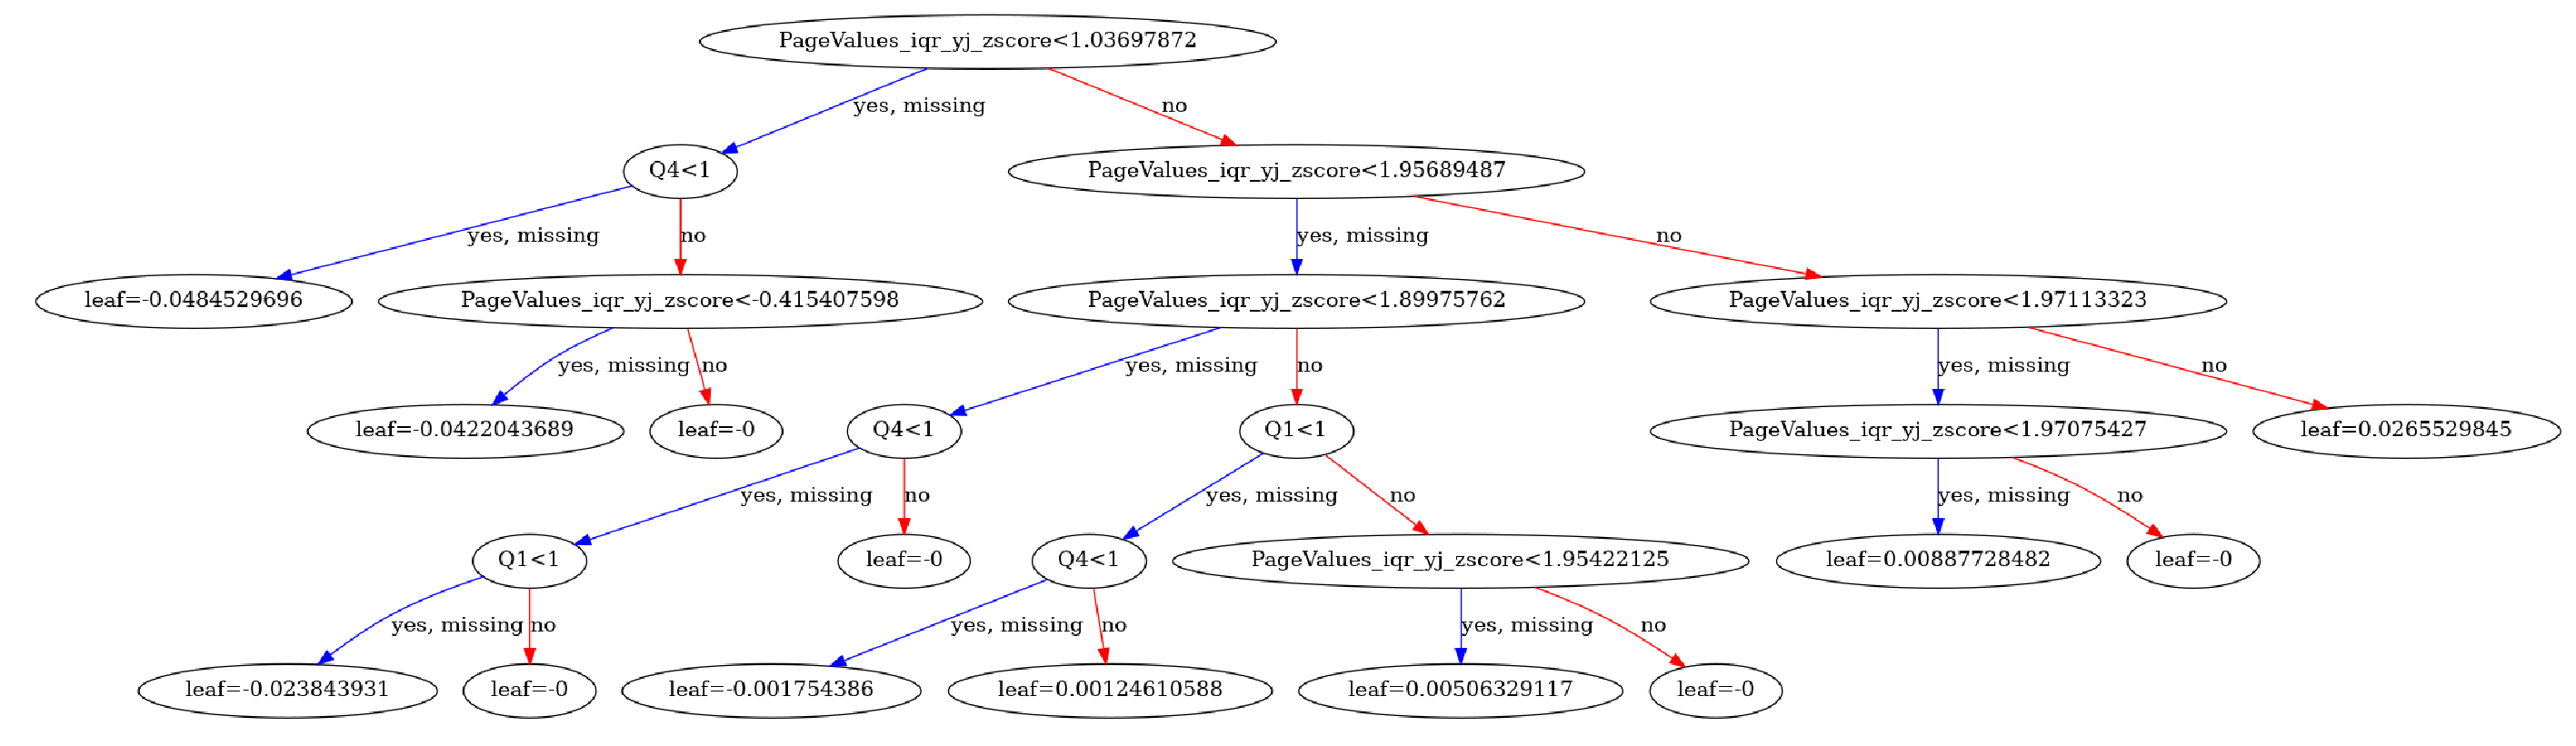

In [17]:
import graphviz
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)

plt.rcParams['figure.figsize'] = [50, 30]
xgb.plot_tree(xg_reg,num_trees=0)

plt.show()

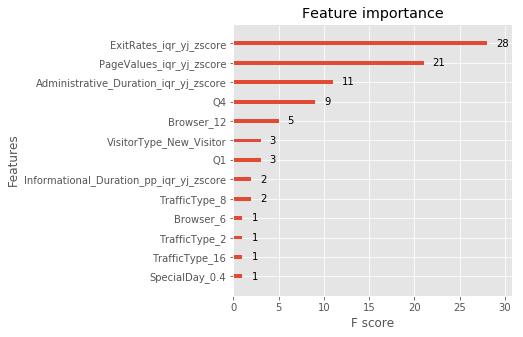

In [18]:
plt.rcParams['figure.figsize'] = [5, 5]
xgb.plot_importance(xg_reg)

plt.show()

### TEST CODE FOR CONFUSION MATRIX
___

In [23]:
### source: https://www.kaggle.com/microtang/prediction-with-high-accuracy-using-xgboost
# Splitting the dataset into the Training set and Validation set
Xt, Xv, yt, yv = train_test_split(X, Y, test_size = 0.3, random_state = 2019)
dt = xgb.DMatrix(Xt.as_matrix(),label=yt.as_matrix())
dv = xgb.DMatrix(Xv.as_matrix(),label=yv.as_matrix())

#Build the model
params = {
    "eta": 0.2,
    "max_depth": 4,
    "objective": "binary:logistic",
    "silent": 1,
    "base_score": np.mean(yt),
    'n_estimators': 1000,
    "eval_metric": "logloss"
}
model = xgb.train(params, dt, 3000, [(dt, "train"),(dv, "valid")], verbose_eval=200)



#Prediction on validation set
y_pred = model.predict(dv)

# Making the Confusion Matrix
cm = confusion_matrix(yv, (y_pred>0.5))
cm



[0]	train-logloss:0.352042	valid-logloss:0.359044


/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.
/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


[200]	train-logloss:0.14549	valid-logloss:0.262414
[400]	train-logloss:0.111843	valid-logloss:0.281322
[600]	train-logloss:0.090538	valid-logloss:0.300201
[800]	train-logloss:0.075019	valid-logloss:0.315813
[1000]	train-logloss:0.063797	valid-logloss:0.329065
[1200]	train-logloss:0.05497	valid-logloss:0.34321
[1400]	train-logloss:0.04786	valid-logloss:0.356575
[1600]	train-logloss:0.042212	valid-logloss:0.369985
[1800]	train-logloss:0.037345	valid-logloss:0.382823
[2000]	train-logloss:0.033275	valid-logloss:0.395554
[2200]	train-logloss:0.030121	valid-logloss:0.405179
[2400]	train-logloss:0.027995	valid-logloss:0.415173
[2600]	train-logloss:0.025903	valid-logloss:0.424014
[2800]	train-logloss:0.024125	valid-logloss:0.433064
[2999]	train-logloss:0.022721	valid-logloss:0.44078


array([[2931,  200],
       [ 265,  303]])

<a id = "202"> <h2> Pipeline 2 </h2> </a>
___

Loading the Dataframe

In [78]:
# load the dataset
# read csv file to a pandas dataframe
df_pipeline2 = pd.read_csv("pipeline_2.csv")

In [79]:
# check for the dataset's keys
df_pipeline2.keys()

Index(['TrafficType_15', 'Month_Nov', 'Administrative_Duration_mm_yj_stdev',
       'VisitorType_New_Visitor', 'Informational_mm_yj_stdev', 'TrafficType_2',
       'TrafficType_3', 'ProductRelated_mm_yj_stdev', 'PageValues_mm_yj_stdev',
       'Month_May', 'TrafficType_13', 'OperatingSystems_3', 'TrafficType_1',
       'add_exit_bounce_rates_mm_yj_stdev', 'Month_Mar', 'TrafficType_18',
       'TrafficType_8', 'SpecialDay_0.8', 'Month_Feb', 'TrafficType_12',
       'Browser_12', 'Revenue'],
      dtype='object')

In [80]:
# check for the size of the dataset
df_pipeline2.shape

(12330, 22)

In [81]:
# ---------------------------------------------------------------------------------------------------
# Extract needed features as a list of columns 
# excluding target variable 'Revenue' and original object features (that were labelencoded), namely 'Month' and VisitorType'
# ---------------------------------------------------------------------------------------------------
## create a list of all the columns
list_all_columns = df_pipeline2.columns.tolist()

## remove features in list, which are not needed for testing for feature selection, namely:
list_remove_features = ['Month', 'VisitorType', 'Revenue'] 

# Create sets of a,b
setA = set(list_all_columns)
setB = set(list_remove_features)

# Get new set with elements that are only in a but not in b
setlist_X_columns = setA.difference(list_remove_features)

# convert set object to a list
list_X_columns = list(setlist_X_columns)

# Define dependent variables
X = df_pipeline2[list_X_columns].to_numpy()

#show the columns that need to be included as features
## sort alphabetically
list_X_columns.sort()
## show list 
list_X_columns

['Administrative_Duration_mm_yj_stdev',
 'Browser_12',
 'Informational_mm_yj_stdev',
 'Month_Feb',
 'Month_Mar',
 'Month_May',
 'Month_Nov',
 'OperatingSystems_3',
 'PageValues_mm_yj_stdev',
 'ProductRelated_mm_yj_stdev',
 'SpecialDay_0.8',
 'TrafficType_1',
 'TrafficType_12',
 'TrafficType_13',
 'TrafficType_15',
 'TrafficType_18',
 'TrafficType_2',
 'TrafficType_3',
 'TrafficType_8',
 'VisitorType_New_Visitor',
 'add_exit_bounce_rates_mm_yj_stdev']

In [82]:
# separate the target variable and rest of variables using iloc
X = df_pipeline2[list_X_columns]
Y = df_pipeline2['Revenue']

In [83]:
#convert the dataset into an optimized data structure called DMatrix
data_dmatrix = xgb.DMatrix(data=X,label=Y)

/opt/tljh/user/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/tljh/user/lib/python3.6/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


In [84]:
# create the train and test set for cross validation
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2019)

In [85]:
# instantiate an XG Boost regressor object 
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 100)

In [86]:
# fit the regressor to the training set and make predictions on the test set
xg_reg.fit(X_train,Y_train)

preds = xg_reg.predict(X_test)

In [87]:
# compute the rmse
rmse = np.sqrt(mean_squared_error(Y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 0.274632


In [88]:
# create a hyperparameter dictionary 
params = {"objective":"reg:squarederror",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=5,
                    num_boost_round=100,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=2019)

In [89]:
cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,0.465993,0.000148,0.466239,0.000371
1,0.441464,0.004344,0.442046,0.003851
2,0.420155,0.006457,0.420727,0.006013
3,0.400623,0.010211,0.401544,0.009461
4,0.382299,0.006695,0.383267,0.006237


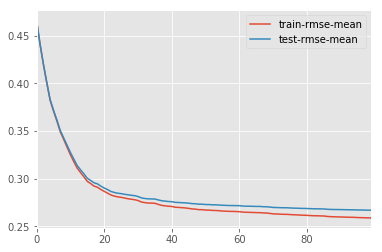

In [90]:
# visualize how rmse changed over training
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

cv_results[['train-rmse-mean','test-rmse-mean']].plot()

In [91]:
# print the final boosting round metric
print((cv_results["test-rmse-mean"]).tail(1))

99    0.266986
Name: test-rmse-mean, dtype: float64


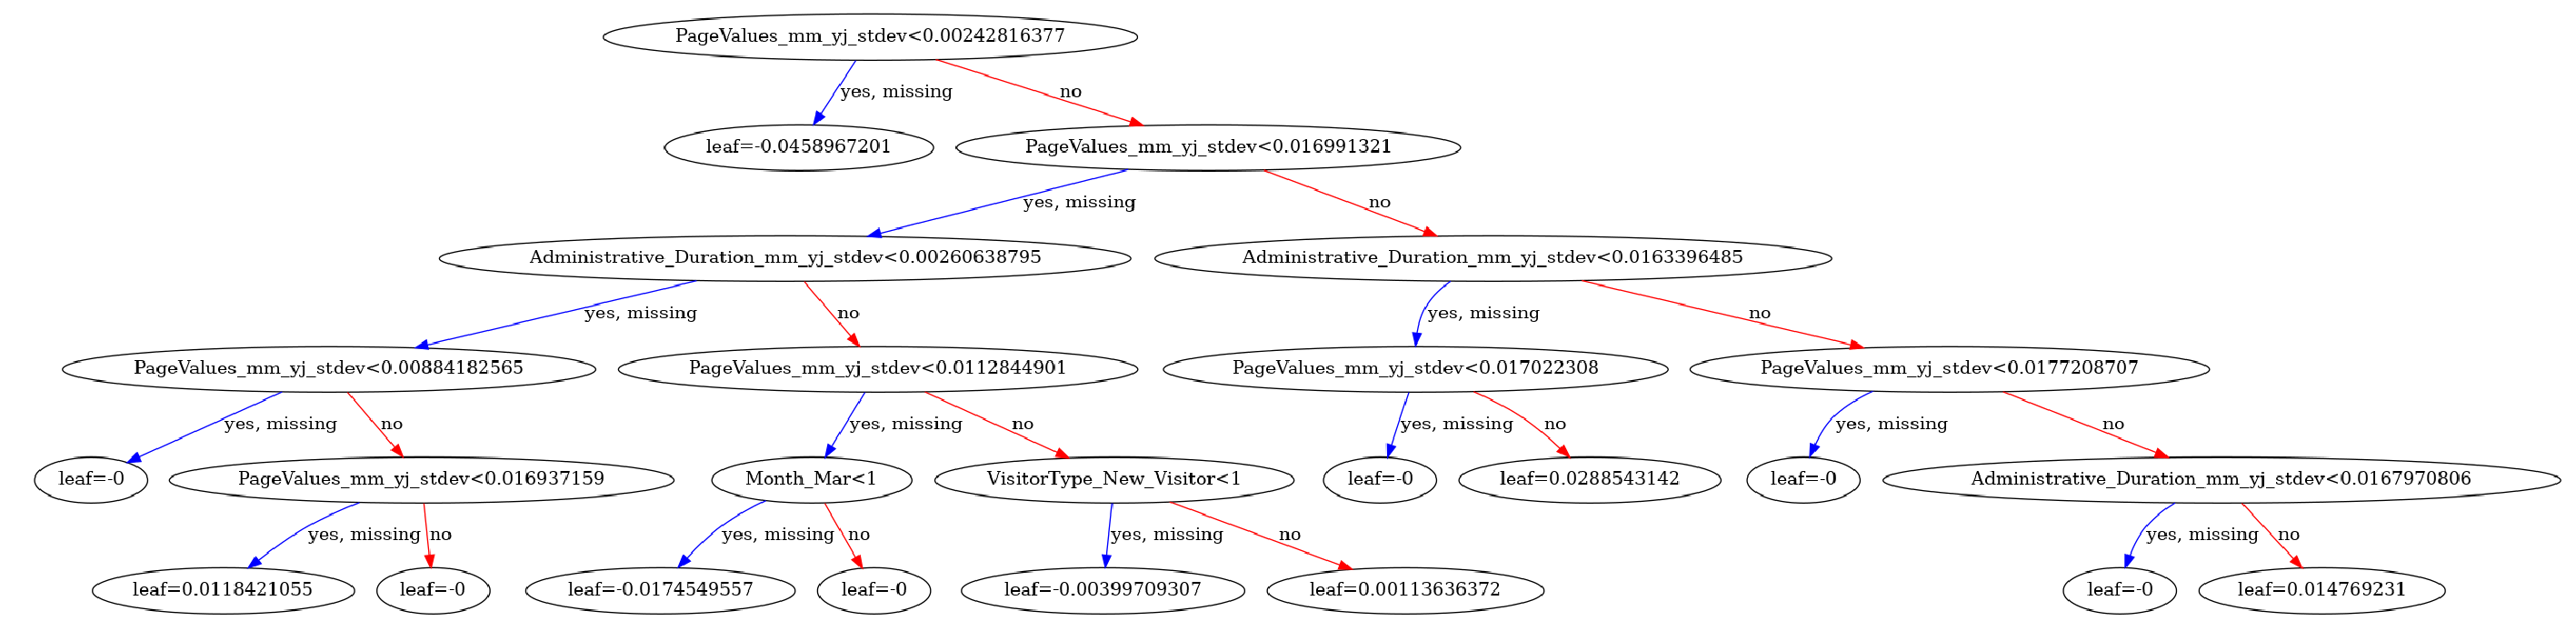

In [92]:
import graphviz
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)

plt.rcParams['figure.figsize'] = [50, 30]
xgb.plot_tree(xg_reg,num_trees=0)

plt.show()

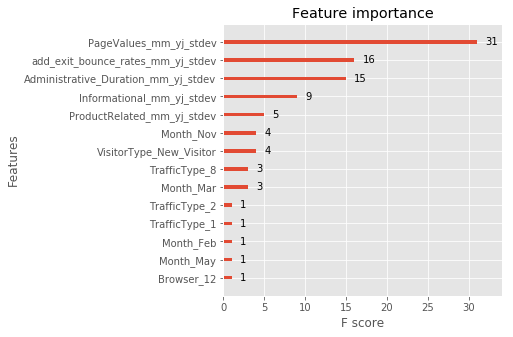

In [93]:
plt.rcParams['figure.figsize'] = [5, 5]
xgb.plot_importance(xg_reg)

plt.show()

<a id = "303"> <h2> Pipeline 3 </h2> </a>
___

Loading the Dataframe

In [40]:
# load the dataset
# read csv file to a pandas dataframe
df_pipeline3 = pd.read_csv("pipeline_3.csv")

In [41]:
# check for the dataset's keys
df_pipeline3.keys()

Index(['PageValues_yj_stdev_zscore', 'Month_Nov', 'VisitorType_New_Visitor',
       'TrafficType_15', 'TrafficType_2', 'TrafficType_3', 'Browser_12',
       'Month_May', 'TrafficType_16', 'TrafficType_13', 'OperatingSystems_6',
       'OperatingSystems_3', 'Browser_13', 'TrafficType_1', 'Month_Mar',
       'SpecialDay_0.8', 'TrafficType_8', 'Month_Feb',
       'Administrative_Duration_yj_stdev_zscore', 'Browser_6',
       'OperatingSystems_7', 'ProductRelated_Duration_yj_stdev_zscore',
       'Revenue'],
      dtype='object')

In [42]:
# check for the size of the dataset
df_pipeline3.shape

(12330, 23)

In [44]:
# ---------------------------------------------------------------------------------------------------
# Extract needed features as a list of columns 
# excluding target variable 'Revenue' and original object features (that were labelencoded), namely 'Month' and VisitorType'
# ---------------------------------------------------------------------------------------------------
## create a list of all the columns
list_all_columns = df_pipeline3.columns.tolist()

## remove features in list, which are not needed for testing for feature selection, namely:
list_remove_features = ['Month', 'VisitorType', 'Revenue'] 

# Create sets of a,b
setA = set(list_all_columns)
setB = set(list_remove_features)

# Get new set with elements that are only in a but not in b
setlist_X_columns = setA.difference(list_remove_features)

# convert set object to a list
list_X_columns = list(setlist_X_columns)

# Define dependent variables
X = df_pipeline3[list_X_columns].to_numpy()

#show the columns that need to be included as features
## sort alphabetically
list_X_columns.sort()
## show list 
list_X_columns

['Administrative_Duration_yj_stdev_zscore',
 'Browser_12',
 'Browser_13',
 'Browser_6',
 'Month_Feb',
 'Month_Mar',
 'Month_May',
 'Month_Nov',
 'OperatingSystems_3',
 'OperatingSystems_6',
 'OperatingSystems_7',
 'PageValues_yj_stdev_zscore',
 'ProductRelated_Duration_yj_stdev_zscore',
 'SpecialDay_0.8',
 'TrafficType_1',
 'TrafficType_13',
 'TrafficType_15',
 'TrafficType_16',
 'TrafficType_2',
 'TrafficType_3',
 'TrafficType_8',
 'VisitorType_New_Visitor']

In [45]:
# separate the target variable and rest of variables using iloc
X = df_pipeline3[list_X_columns]
Y = df_pipeline3['Revenue']

In [46]:
#convert the dataset into an optimized data structure called DMatrix
data_dmatrix = xgb.DMatrix(data=X,label=Y)

/opt/tljh/user/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/tljh/user/lib/python3.6/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


In [47]:
# create the train and test set for cross validation
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2019)

In [48]:
# instantiate an XG Boost regressor object 
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 100)

In [49]:
# fit the regressor to the training set and make predictions on the test set
xg_reg.fit(X_train,Y_train)

preds = xg_reg.predict(X_test)

In [50]:
# compute the rmse
rmse = np.sqrt(mean_squared_error(Y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 0.279694


In [51]:
# create a hyperparameter dictionary 
params = {"objective":"reg:squarederror",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=5,
                    num_boost_round=100,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=2019)

In [52]:
cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,0.466218,0.000133,0.466434,0.000432
1,0.440373,0.004307,0.440580,0.004745
2,0.417759,0.006473,0.417918,0.006811
3,0.400914,0.003819,0.401408,0.004645
4,0.386156,0.003420,0.387045,0.004072


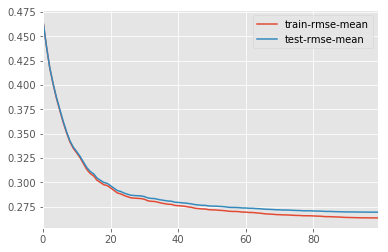

In [53]:
# visualize how rmse changed over training
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

cv_results[['train-rmse-mean','test-rmse-mean']].plot()

In [54]:
# print the final boosting round metric
print((cv_results["test-rmse-mean"]).tail(1))

99    0.269218
Name: test-rmse-mean, dtype: float64


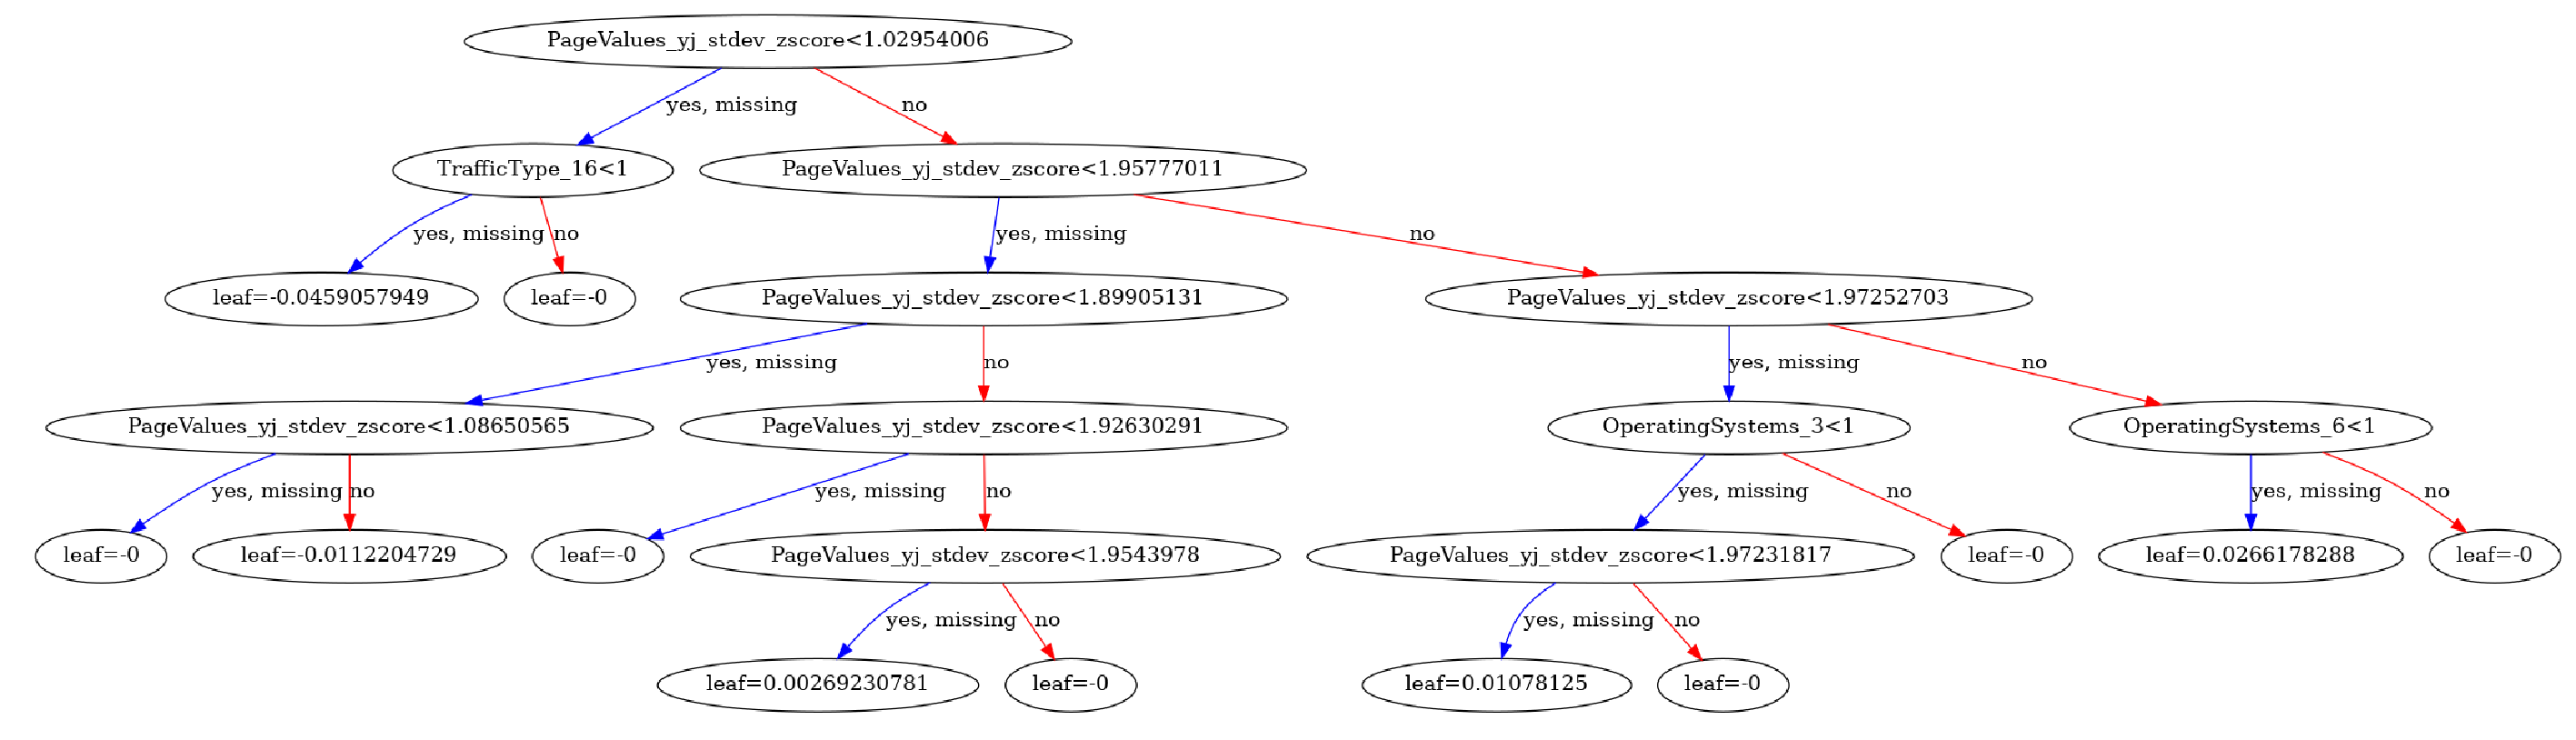

In [55]:
import graphviz
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)

plt.rcParams['figure.figsize'] = [50, 30]
xgb.plot_tree(xg_reg,num_trees=0)

plt.show()

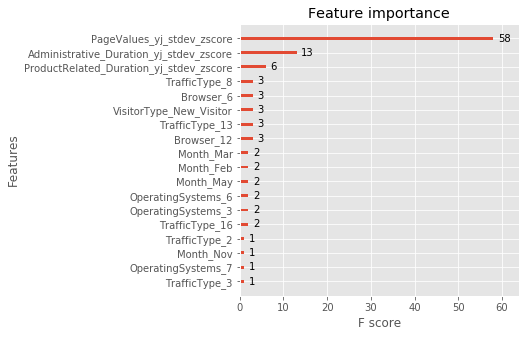

In [56]:
plt.rcParams['figure.figsize'] = [5, 5]
xgb.plot_importance(xg_reg)

plt.show()